# What is word2vec?
Word2vec is the technique/model to produce word embedding for better word representation. It captures a large number of precise syntactic and semantic word relationship. It is a shallow two-layered neural network. Before going further, please see the difference between shallow and deep neural network:
The shallow neural network consists of the only a hidden layer between input and output whereas deep neural network contains multiple hidden layers between input and output. Input is subjected to nodes whereas the hidden layer, as well as the output layer, contains neurons.
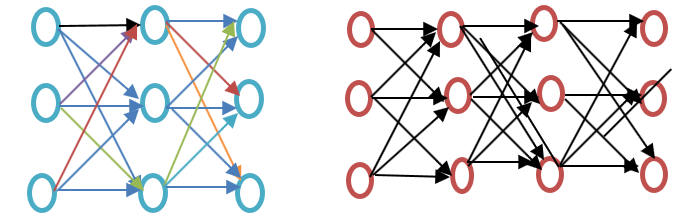
word2vec is a two-layer network where there is input one hidden layer and output.

In [19]:
import pandas as pd
import nltk
datacorp = pd.read_pickle('pickles/corpus.pkl')
datacorp["unigrams"] = datacorp["text"].apply(nltk.word_tokenize)
datacorp

,text,unigrams
ignitis2020_q1_en_eur_con_ias.txt,interim report consolidated interim report for...,"[interim, report, consolidated, interim, repor..."
ignitis2020_q2_en_eur_con_ias.txt,interim report consolidated interim report for...,"[interim, report, consolidated, interim, repor..."
ignitis2020_q2_en_eur_con_ias_00.txt,interim report consolidated interim report for...,"[interim, report, consolidated, interim, repor..."
ignitis2020_q3_en_eur_con_ias.txt,interim report first nine months consolidated ...,"[interim, report, first, nine, months, consoli..."


In [25]:
import nltk
import gensim
from nltk.corpus import abc


model= gensim.models.Word2Vec(datacorp.unigrams)
X = list(model.wv.vocab)

data=model.wv.most_similar('electricity')
print(data)

[('distributed', 0.9964145421981812), ('wholesale', 0.9942359924316406), ('generated', 0.9936931133270264), ('expansion', 0.9916709065437317), ('network', 0.9908111095428467), ('gas', 0.9906017780303955), ('sales', 0.9898593425750732), ('distribution', 0.989540696144104), ('retail', 0.9889292120933533), ('twh', 0.9886441230773926)]


In [26]:
from gensim.models import Word2Vec

Model= Word2Vec(datacorp.unigrams,min_count=1,size=300,workers=4)

In [38]:
similar_words = Model.most_similar('climate')
print(similar_words)

[('thermo', 0.9802589416503906), ('implements', 0.9802393317222595), ('executives', 0.9802224636077881), ('credit', 0.9801959991455078), ('line', 0.9801511168479919), ('dedicated', 0.9801130294799805), ('best', 0.9801124334335327), ('erwin', 0.9800965189933777), ('support', 0.9800430536270142), ('contribute', 0.9800378084182739)]


<ipython-input-38-44aa2700b01a>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  similar_words = Model.most_similar('climate')


In [34]:
similarity_two_words = model.wv.similarity('electricity','expansion')
print(similarity_two_words)

Please provide the similarity between these two words:
0.9916709


In [42]:
query_E = ['Biodiversity', 'Carbon','Cleantech','Clean' , 'Climate' , 'Coal' , 'Conservation' , 'Ecosystem' , 'Emission' , 'Energy' , 'Fuel' , 'Green' , 'Land' , 'Natural' , 'Pollution' , 'Renewable' , 'Resources' , 'Sustainability' , 'Sustainable' , 'Toxic' , 'Waste' , 'Water']
E = [x.lower() for x in query_E]
query_S = ['Accident' , 'Alcohol' , 'Anti-personnel' , 'Behavior', 'Charity','Community' , 'Controversial' , 'Controversy' , 'Discrimination' , 'Gambling' , 'Health' , 'Human capital' , 'Human rights' , 'Inclusion' , 'Injury' , 'Lab','Munitions' , 'Opposition' , 'Pay' , 'Philanthropic' , 'Quality' , 'Responsible']
S = [x.lower() for x in query_S]
query_G = ['Advocacy' , 'Bribery' , 'Compensation' , 'Competitive' ,'Corruption' , 'Divestment' , 'Fraud' , 'GRI', 'Independent' , 'Justice' , 'Stability' , 'Stewardship' , 'Transparency']
G = [x.lower() for x in query_G]

In [86]:
import nltk, random

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    return tokens

def search_abstract_single_word(tokens, keyword):
    match = 0
    for token in tokens:
        if token == keyword:
            match += 1
    return match

def search_file_single_word(abstract_list, keyword):
    matches = list()
    for item in abstract_list:
        tokens = tokenize(item)
        match = search_abstract_single_word(tokens, keyword)
        matches.append(match)
    return matches

In [80]:
def calculate_score_for_text(text,keywords):
    for i in keywords:
        score = search_file_single_word(text, i)
        print(i,score)

In [81]:
calculate_score_for_text(datacorp.text,E)

biodiversity [0, 0, 0, 0]
carbon [4, 1, 1, 3]
cleantech [0, 0, 0, 0]
clean [0, 0, 0, 0]
climate [0, 11, 11, 1]
coal [0, 0, 0, 1]
conservation [0, 0, 0, 0]
ecosystem [0, 0, 0, 0]
emission [23, 12, 37, 35]
energy [48, 92, 100, 70]
fuel [7, 8, 14, 6]
green [53, 63, 63, 65]
land [0, 0, 28, 28]
natural [24, 22, 39, 31]
pollution [1, 0, 0, 0]
renewable [11, 16, 30, 28]
resources [4, 3, 4, 4]
sustainability [0, 8, 8, 15]
sustainable [3, 11, 11, 10]
toxic [0, 0, 0, 0]
waste [8, 14, 16, 10]
water [3, 12, 12, 5]


In [82]:
calculate_score_for_text(datacorp.text,G)

advocacy [0, 0, 0, 0]
bribery [1, 1, 1, 1]
compensation [6, 8, 22, 19]
competitive [0, 3, 3, 2]
corruption [1, 7, 7, 2]
divestment [0, 0, 0, 0]
fraud [0, 6, 0, 0]
gri [0, 37, 37, 0]
independent [31, 45, 43, 31]
justice [0, 0, 0, 0]
stability [4, 2, 2, 1]
stewardship [0, 0, 0, 0]
transparency [0, 1, 1, 2]


In [83]:
calculate_score_for_text(datacorp.text,S)

accident [1, 0, 2, 2]
alcohol [0, 0, 0, 0]
anti-personnel [0, 0, 0, 0]
behavior [0, 0, 0, 0]
charity [0, 0, 0, 0]
community [2, 2, 2, 2]
controversial [0, 0, 0, 0]
controversy [0, 0, 0, 0]
discrimination [3, 7, 7, 3]
gambling [0, 0, 0, 1]
health [6, 16, 16, 7]
human capital [0, 0, 0, 0]
human rights [0, 0, 0, 0]
inclusion [0, 4, 4, 0]
injury [0, 2, 2, 0]
lab [0, 0, 0, 3]
munitions [0, 0, 0, 0]
opposition [0, 0, 0, 0]
pay [3, 11, 8, 11]
philanthropic [0, 0, 0, 0]
quality [8, 7, 7, 6]
responsible [9, 11, 10, 7]
